In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path = "D:/HAR\Human Action Recognition"
y_temp = pd.read_csv(path+"/Training_set.csv")
y=[]
for i in os.listdir(path+"/train"):
    index = i.split("_")[1]
    index = int(index.split(".")[0])
    y.append(y_temp.label[index-1])
y = np.array(y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [3]:
def make_image(size=32):
    path = "D:/HAR\Human Action Recognition"
    X = []
    for i in os.listdir(path+"/train"):
        temp = cv2.imread(path+"/train/"+i)
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        temp = cv2.resize(temp, (size, size))
        X.append(temp)
    X = np.array(X)
    X = X/255.0
    return X

In [4]:
X = make_image(128)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
base_model = keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(15, activation="softmax", kernel_initializer="he_normal")(x)
model = keras.models.Model(inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
top_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
296/296 [==============================] - 16s 35ms/step - loss: 1.6147 - accuracy: 0.4848 - val_loss: 1.2561 - val_accuracy: 0.5933
Epoch 2/10
296/296 [==============================] - 9s 30ms/step - loss: 1.0911 - accuracy: 0.6436 - val_loss: 1.1460 - val_accuracy: 0.6305
Epoch 3/10
296/296 [==============================] - 9s 30ms/step - loss: 0.9402 - accuracy: 0.6923 - val_loss: 1.1392 - val_accuracy: 0.6403
Epoch 4/10
296/296 [==============================] - 9s 30ms/step - loss: 0.8552 - accuracy: 0.7211 - val_loss: 1.1421 - val_accuracy: 0.6346
Epoch 5/10
296/296 [==============================] - 9s 30ms/step - loss: 0.7820 - accuracy: 0.7434 - val_loss: 1.1257 - val_accuracy: 0.6435
Epoch 6/10
296/296 [==============================] - 9s 30ms/step - loss: 0.7222 - accuracy: 0.7659 - val_loss: 1.1555 - val_accuracy: 0.6352
Epoch 7/10
296/296 [==============================] - 9s 31ms/step - loss: 0.6834 - accuracy: 0.7771 - val_loss: 1.1392 - val_accuracy: 0.645

In [7]:
for layer in model.layers:
    layer.trainable=True

In [8]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
296/296 [==============================] - 32s 93ms/step - loss: 1.7306 - accuracy: 0.5353 - val_loss: 1.7261 - val_accuracy: 0.5432
Epoch 2/30
296/296 [==============================] - 27s 90ms/step - loss: 0.8205 - accuracy: 0.7399 - val_loss: 1.5851 - val_accuracy: 0.5740
Epoch 3/30
296/296 [==============================] - 26s 89ms/step - loss: 0.5935 - accuracy: 0.8072 - val_loss: 1.9795 - val_accuracy: 0.5070
Epoch 4/30
296/296 [==============================] - 26s 88ms/step - loss: 0.4727 - accuracy: 0.8397 - val_loss: 2.6585 - val_accuracy: 0.4644
Epoch 5/30
296/296 [==============================] - 27s 93ms/step - loss: 0.3579 - accuracy: 0.8806 - val_loss: 1.6503 - val_accuracy: 0.5914
Epoch 6/30
296/296 [==============================] - 27s 93ms/step - loss: 0.3209 - accuracy: 0.8941 - val_loss: 2.4101 - val_accuracy: 0.4876
Epoch 7/30
296/296 [==============================] - 27s 93ms/step - loss: 0.2910 - accuracy: 0.9029 - val_loss: 1.9170 - val_accuracy:

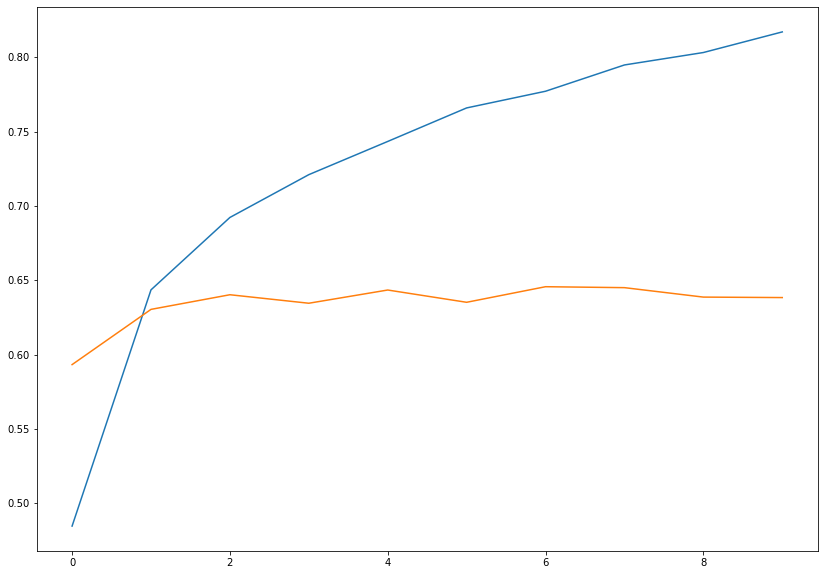

In [9]:
plt.figure(figsize=(14, 10))
plt.plot(top_history.history["accuracy"])
plt.plot(top_history.history["val_accuracy"])

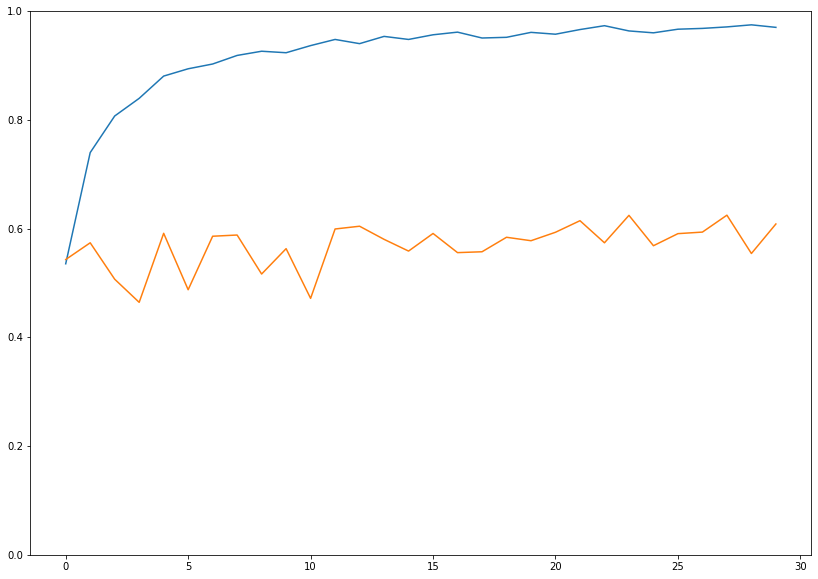

In [11]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

# Without weight freeze 

In [6]:
base_model = keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
predictions = keras.layers.Dense(15, activation="softmax", kernel_initializer="he_normal")(x)
model = keras.models.Model(inputs = base_model.input, outputs = predictions)

    
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
no_freeze_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
296/296 [==============================] - 35s 92ms/step - loss: 1.6044 - accuracy: 0.5228 - val_loss: 1.5462 - val_accuracy: 0.5622
Epoch 2/30
296/296 [==============================] - 25s 85ms/step - loss: 0.8932 - accuracy: 0.7147 - val_loss: 1.6423 - val_accuracy: 0.5514
Epoch 3/30
296/296 [==============================] - 25s 85ms/step - loss: 0.6352 - accuracy: 0.7915 - val_loss: 1.9551 - val_accuracy: 0.5194
Epoch 4/30
296/296 [==============================] - 26s 87ms/step - loss: 0.4965 - accuracy: 0.8338 - val_loss: 2.0156 - val_accuracy: 0.5403
Epoch 5/30
296/296 [==============================] - 26s 88ms/step - loss: 0.3840 - accuracy: 0.8671 - val_loss: 1.9913 - val_accuracy: 0.5311
Epoch 6/30
296/296 [==============================] - 26s 88ms/step - loss: 0.3224 - accuracy: 0.8916 - val_loss: 2.1168 - val_accuracy: 0.5333
Epoch 7/30
296/296 [==============================] - 26s 88ms/step - loss: 0.2732 - accuracy: 0.9105 - val_loss: 1.9505 - val_accuracy:

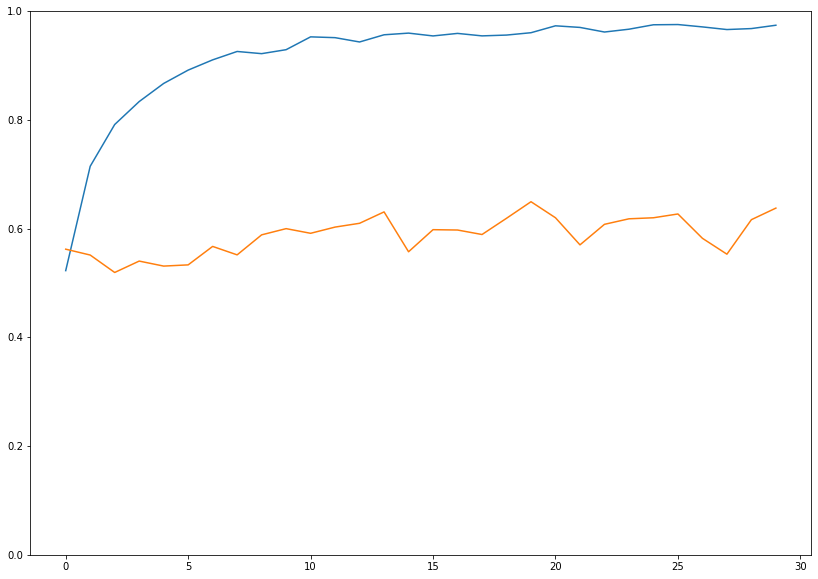

In [7]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 1)
plt.plot(no_freeze_history.history["accuracy"])
plt.plot(no_freeze_history.history["val_accuracy"])